In [1]:
from hmf import MassFunction     # The main hmf class
import matplotlib.pyplot as plt  # The necessary plotting library
import numpy as np               # Numerical array library
from astropy.cosmology import Planck18_arXiv_v2 as cosmo

# This just serves to render plots inline in the notebook. Do not use in a script.
%matplotlib inline

In [2]:
import hmf
from hmf import functional
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('text', usetex=True)
import numpy as np
import scipy.integrate
import astropy
from astropy.cosmology import LambdaCDM, Planck18_arXiv_v2

In [3]:
MassFunction.get_all_parameter_defaults(recursive=False)

{'cosmo_model': FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486),
 'cosmo_params': {},
 'n': 0.9667,
 'sigma_8': 0.8159,
 'growth_params': {},
 'lnk_min': -18.420680743952367,
 'lnk_max': 9.903487552536127,
 'dlnk': 0.05,
 'z': 0.0,
 'transfer_model': hmf.density_field.transfer_models.CAMB,
 'transfer_params': {},
 'takahashi': True,
 'growth_model': hmf.cosmology.growth_factor.GrowthFactor,
 'hmf_model': hmf.mass_function.fitting_functions.Tinker08,
 'Mmin': 10,
 'Mmax': 15,
 'dlog10m': 0.01,
 'mdef_model': None,
 'mdef_params': {},
 'delta_c': 1.686,
 'hmf_params': {},
 'filter_model': hmf.density_field.filters.TopHat,
 'filter_params': {},
 'disable_mass_conversion': True}

In [11]:
print(mf.quantities_available())

['_dlnsdlnm', '_growth_factor_fn', '_gtm', '_normalisation', '_power0', '_sigma_0', '_unn_sig8', '_unn_sigma0', '_unnormalised_lnT', '_unnormalised_power', 'cosmo', 'delta_k', 'dndlnm', 'dndlog10m', 'dndm', 'filter', 'fsigma', 'growth', 'growth_factor', 'halo_overdensity_crit', 'halo_overdensity_mean', 'hmf', 'how_big', 'k', 'lnsigma', 'm', 'mass_nonlinear', 'mdef', 'mean_density', 'mean_density0', 'n_eff', 'ngtm', 'nonlinear_delta_k', 'nonlinear_power', 'normalised_filter', 'nu', 'power', 'radii', 'rho_gtm', 'rho_ltm', 'sigma', 'transfer', 'transfer_function']


In [8]:
import pandas
df = pandas.read_csv('../CV_Vals/cv_mashian.csv')
z_vals = df["z"].values
z_vals = z_vals[::-1]
dz_vals = df["dz"].values
dz_vals = dz_vals[::-1]

all_mean = []
all_sig_v = []
    
# Loop over z values
for z in z_vals:
    masses = np.array([7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0])    
    mf = MassFunction(cosmo_model=cosmo,z=z,Mmin=mmin,Mmax=mmax, hmf_model="SMT")
    # Find volume of space within redshift bin
    dz = df.loc[df['z'] == z][["dz"]].values[0][0]
    vol = cosmo.comoving_volume(z + dz/2).value - cosmo.comoving_volume(z - dz/2).value
#     print(vol* survey_area / tot_sky)
z_vals[5]

15.311

In [9]:
z = z_vals[5] # Redshift value to plot
mmin = 9 # Minimum halo mass for HMF
mmax = 13.5 # Maximum halo mass for HMF
ABmax = 31.5 # Max magnitude JWST can see

cosmo = Planck18_arXiv_v2 # Define temporary cosmology for volume calculation
vol = cosmo.comoving_volume(z + 0.5*dz_vals[5]).value - cosmo.comoving_volume(z - dz_vals[5]*0.5).value
side1=10/60
side2=19/60
tot_sky = 41253. # Total square degrees in the sky
survey_area = side1*side2 # Survey area in square degrees
num_gal = 1 # Minimum number of galaxies needed within the survey area

# Find number density that would be visible to JWST
nmin = tot_sky / vol / survey_area

# Values for the stellar baryon fraction
# Rough estimate of 1/70 and extrapolation from Finkelstein
# sbf_vals = [1./70, 0.051 + 0.024 * (z - 4)]
sbf_vals = [0.018, 0.051 + 0.024 * (z - 4), 0.051 + 0.031 * (z - 4), 0.051 + 0.017 * (z - 4)]

# Calculating change in magnitude due to wavelength
# Uses 1505 and 1605 because values at 1500 and 1600 Å are not in the continuum data
w_original = 1500 + 5 # From the Song 2016 M*-MUV relation
w_new = 1600 + 5

# Load spectrum
data = np.loadtxt("erb2010_continuum.dat")
x = data[:,0]
y = data[:,1] * x**2 / 3.e18

# Shift luminosity using spectrum assumption
shift = 2.5 * np.log10(y[x==w_original]/y[x==w_new])

In [10]:
mf = MassFunction(cosmo_model=cosmo,z=z,Mmin=mmin,Mmax=mmax, hmf_model="PS")

In [137]:
little_h=mf.cosmo_model.h
lnmass=np.log10(mf.m)
dndm=mf.dndm
dndm=dndm/little_h**3
mass=mass*little_h
stellar_mass=mass*0.018

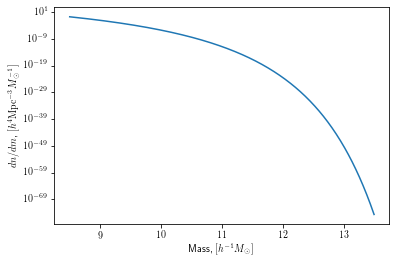

In [141]:
plt.plot(np.log10(mf.m),mf.dndlnm)
# plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"Mass, $[h^{-1}M_\odot]$")
plt.ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$");

In [56]:
hmf = functional.get_hmf(['dndm','m'],z=z,Mmin=mmin,Mmax=mmax, hmf_model='SMT')

In [7]:
k=50
z = z_vals[k] # Redshift value to plot
mmin = 8.5 # Minimum halo mass for HMF
mmax = 13.5 # Maximum halo mass for HMF
ABmax = 31.5 # Max magnitude JWST can see

cosmo = Planck18_arXiv_v2 # Define temporary cosmology for volume calculation
vol = cosmo.comoving_volume(z + 0.5*dz_vals[k]).value - cosmo.comoving_volume(z - dz_vals[k]*0.5).value
side1=10/60
side2=19/60
tot_sky = 41253. # Total square degrees in the sky
survey_area = side1*side2 # Survey area in square degrees
num_gal = 1 # Minimum number of galaxies needed within the survey area

In [155]:
import hmf
from hmf import functional
for quants, h, l in functional.get_hmf(['dndm','m'],z=z,Mmin=mmin,Mmax=mmax, hmf_model='SMT'):
    dndm = h.dndm
    mass = h.m

    little_h = h.cosmo_model.h
    mass = mass * little_h
    stellar_mass = mass * 0.018
    
M_vals=-2.*(1.56 + np.log10(stellar_mass))
m = M_vals + cosmo.distmod(z).value+shift[0]
u_lim = max(m)
l_lim = min(m)
u_lim = min(u_lim, ABmax) # Compare dimmest object to telescope limit 
index= m<=u_lim
stellar_mass=stellar_mass[index]
mass_bin=[]
masks=[]
masses = np.array([7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0]) 
for i in range(len(masses)):
    mask=np.log10(stellar_mass)<masses[i]
    masks.append(mask)
    mass_bin.append(stellar_mass[mask])
integral=np.zeros(len(masses))
for i in range(len(masses)):
    if i==0:
        integral[i]=np.trapz(dndm[:len(mass_bin[i])],mass_bin[i])
    else:
        integral[i]=np.trapz(dndm[:len(mass_bin[i])],mass_bin[i])-sum(integral)

In [45]:
import hmf
from hmf import functional
for quants, h, l in functional.get_hmf(['dndm','m'],z=z,Mmin=mmin,Mmax=mmax, hmf_model='SMT'):
    dndm = h.dndm
    mass = h.m

    little_h = h.cosmo_model.h
    mass = mass * little_h
    stellar_mass = mass * 0.018
    
M_vals=-2.*(1.56 + np.log10(stellar_mass))
m = M_vals + cosmo.distmod(z).value+shift[0]
u_lim = max(m)
l_lim = min(m)
u_lim = min(u_lim, ABmax) # Compare dimmest object to telescope limit 
index= m<=u_lim
stellar_mass=stellar_mass[index]
mass_bin=[]
masks=[]
integral=np.zeros(len(stellar_mass))
for i in range(len(stellar_mass)):
    integral[i]=np.trapz(dndm[index][::-1][:i]*little_h**3,stellar_mass[::-1][:i])

Text(0, 0.5, 'n, $[{\\rm Mpc}^{-3}]$')

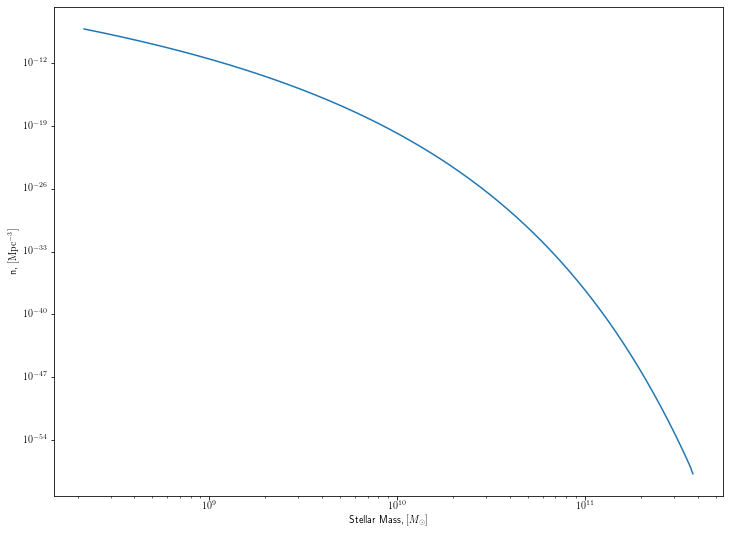

In [46]:
fig = plt.figure(figsize = (12, 9))
plt.plot(stellar_mass[2:],-integral[2:][::-1])
# plt.plot(stellar_mass,mass_func)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"Stellar Mass, $[M_\odot]$")
plt.ylabel(r"n, $[{\rm Mpc}^{-3}]$")
# plt.ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$")

In [47]:
from scipy.interpolate import InterpolatedUnivariateSpline as _spline
import scipy.integrate as intg
def inte(dndm,M):
#     Eliminate NaN's
    m = M[np.logical_not(np.isnan(dndm))]
    dndm = dndm[np.logical_not(np.isnan(dndm))]
    dndlnm = m * dndm

    if len(m) < 4:
        raise NaNException(
            "There are too few real numbers in dndm: len(dndm) = %s, #NaN's = %s"
            % (len(M), len(M) - len(dndm))
        )

    # Calculate the mass function (and its integral) from the highest M up to 10**18
    if m[-1] < m[0] * 10 ** 18 / m[3]:
        m_upper = np.arange(
            np.log(m[-1]), np.log(10 ** 18), np.log(m[1]) - np.log(m[0])
        )
        mf_func = _spline(np.log(m), np.log(dndlnm), k=1)
        mf = mf_func(m_upper)

        int_upper = intg.simps(np.exp(mf), dx=m_upper[2] - m_upper[1], even="first")


    # Calculate the cumulative integral (backwards) of [m*]dndlnm
        ngtm = np.concatenate((intg.cumtrapz(dndlnm[::-1], dx=np.log(m[1]) - np.log(m[0]))[::-1],np.zeros(1),))

    return ngtm + int_upper

Text(0, 0.5, 'n, $[{\\rm Mpc}^{-3}]$')

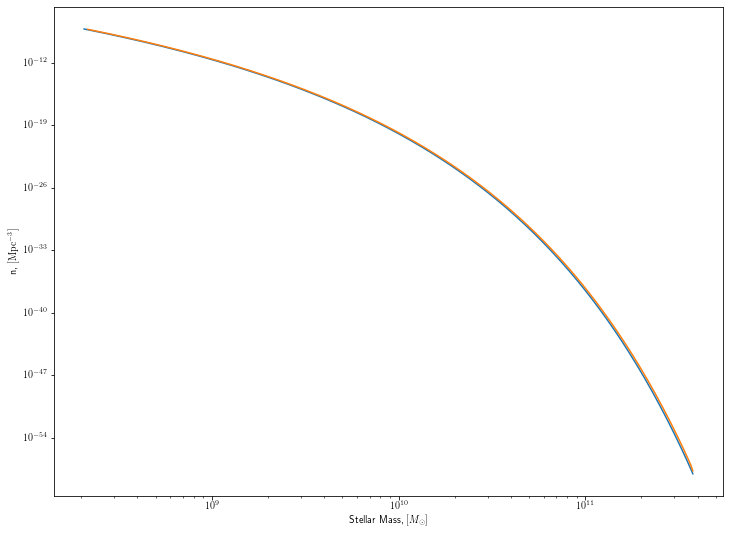

In [48]:
n=inte(dndm[index]*little_h**3,stellar_mass)
fig = plt.figure(figsize = (12, 9))
plt.plot(stellar_mass,n)
plt.plot(stellar_mass[2:],-integral[2:][::-1])
# plt.plot(stellar_mass,mass_func)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r"Stellar Mass, $[M_\odot]$")
plt.ylabel(r"n, $[{\rm Mpc}^{-3}]$")
# plt.ylabel(r"$dn/dm$, $[h^{4}{\rm Mpc}^{-3}M_\odot^{-1}]$")

In [125]:
M_vals=-2.*(1.56 + np.log10(stellar_mass))
m = M_vals + cosmo.distmod(z).value+shift[0]
u_lim = max(m)
l_lim = min(m)
u_lim = min(u_lim, ABmax) # Compare dimmest object to telescope limit 
index= m<=u_lim
stellar_mass=stellar_mass[index]
mass_bin=[]
masks=[]
masses = np.array([7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0]) 
for i in range(len(masses)):
    mask=np.log10(stellar_mass)<masses[i]
    masks.append(mask)
    mass_bin.append(stellar_mass[mask])
integral=np.zeros(len(masses))
for i in range(len(masses)):
    if i==0:
        integral[i]=np.trapz(dndm[:len(mass_bin[i])],mass_bin[i])
    else:
        integral[i]=np.trapz(dndm[:len(mass_bin[i])],mass_bin[i])-sum(integral)

In [126]:
inte=np.trapz(dndm[:len(stellar_mass)],stellar_mass)

In [127]:
sum(integral), inte

(0.0005765612758498375, 0.0005765612758498376)

In [129]:
means=[]
for i in range(len(masses)):
    means.append(integral[i] * vol * survey_area / tot_sky)

In [130]:
means

[6.635682713763919,
 12.350440829250074,
 0.45256157020821436,
 0.007707448261856404,
 4.576525033522542e-05,
 6.180808456227905e-08,
 9.814934068222152e-12,
 3.65683087489648e-15,
 0.0]